# Project



In [141]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import os
import datetime as dt
import random

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

%matplotlib inline 

In [142]:
import os


df =pd.read_csv('../Stocks/pfe.us.txt')
df.shape
display(df)
# for filename in os.listdir('Stocks'):
#     if filename.endswith(".txt"):
#         print(os.path.join('Stocks', filename))
#         df =pd.read_csv(os.path.join('Stocks', filename))
#         df.shape
#         df=df.dropna()
#         display(df)
#         break
#     else:
#         continue

,Date,Open,High,Low,Close,Volume,OpenInt
0,1982-01-04,0.5243,0.5324,0.51690,0.5169,4176469,0
1,1982-01-05,0.5169,0.5169,0.50890,0.5089,7494341,0
2,1982-01-06,0.5009,0.5169,0.49294,0.5169,16681350,0
3,1982-01-07,0.5243,0.5324,0.51690,0.5243,26205667,0
4,1982-01-08,0.5324,0.5400,0.52430,0.5324,22575014,0
...,...,...,...,...,...,...,...
9037,2017-11-06,35.2680,35.2880,34.80200,35.0000,10722965,0
9038,2017-11-07,34.9800,35.0990,34.92100,35.0400,10992031,0
9039,2017-11-08,35.0500,35.0700,34.71300,35.0200,13693200,0
9040,2017-11-09,35.0800,35.2500,34.84000,35.2000,13364668,0


In [146]:
df_cboe=  pd.read_csv('../cboe.csv')
display(df_cboe)


,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61
...,...,...,...,...,...
3532,01/12/2018,9.74,10.31,9.54,10.16
3533,01/16/2018,10.42,12.41,10.40,11.66
3534,01/17/2018,11.35,12.81,11.18,11.91
3535,01/18/2018,12.01,12.40,11.62,12.22


In [147]:
import datetime


df_cboe['Date']=df_cboe['Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime("%Y-%m-%d"))
df_cboe=df_cboe.dropna()
display(df_cboe)

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,2004-01-02,17.96,18.68,17.54,18.22
1,2004-01-05,18.45,18.49,17.44,17.49
2,2004-01-06,17.66,17.67,16.19,16.73
3,2004-01-07,16.72,16.75,15.50,15.50
4,2004-01-08,15.42,15.68,15.32,15.61
...,...,...,...,...,...
3532,2018-01-12,9.74,10.31,9.54,10.16
3533,2018-01-16,10.42,12.41,10.40,11.66
3534,2018-01-17,11.35,12.81,11.18,11.91
3535,2018-01-18,12.01,12.40,11.62,12.22


In [148]:
df_all = pd.merge(df, df_cboe, how='inner')

In [149]:
display(df_all)

,Date,Open,High,Low,Close,Volume,OpenInt,VIX Open,VIX High,VIX Low,VIX Close
0,2004-01-02,27.731,28.136,27.667,27.825,21170596,0,17.96,18.68,17.54,18.22
1,2004-01-05,28.152,28.567,28.136,28.567,39160284,0,18.45,18.49,17.44,17.49
2,2004-01-06,28.802,28.802,28.371,28.550,29626644,0,17.66,17.67,16.19,16.73
3,2004-01-07,28.348,28.802,28.293,28.794,21424852,0,16.72,16.75,15.50,15.50
4,2004-01-08,28.802,28.820,28.231,28.530,23630636,0,15.42,15.68,15.32,15.61
...,...,...,...,...,...,...,...,...,...,...,...
3486,2017-11-06,35.268,35.288,34.802,35.000,10722965,0,9.63,9.74,9.38,9.40
3487,2017-11-07,34.980,35.099,34.921,35.040,10992031,0,9.31,10.31,9.29,9.89
3488,2017-11-08,35.050,35.070,34.713,35.020,13693200,0,9.79,10.27,9.50,9.78
3489,2017-11-09,35.080,35.250,34.840,35.200,13364668,0,9.94,12.19,9.79,10.50


In [150]:
df_all=df_all.dropna()
display(df_all)

,Date,Open,High,Low,Close,Volume,OpenInt,VIX Open,VIX High,VIX Low,VIX Close
0,2004-01-02,27.731,28.136,27.667,27.825,21170596,0,17.96,18.68,17.54,18.22
1,2004-01-05,28.152,28.567,28.136,28.567,39160284,0,18.45,18.49,17.44,17.49
2,2004-01-06,28.802,28.802,28.371,28.550,29626644,0,17.66,17.67,16.19,16.73
3,2004-01-07,28.348,28.802,28.293,28.794,21424852,0,16.72,16.75,15.50,15.50
4,2004-01-08,28.802,28.820,28.231,28.530,23630636,0,15.42,15.68,15.32,15.61
...,...,...,...,...,...,...,...,...,...,...,...
3486,2017-11-06,35.268,35.288,34.802,35.000,10722965,0,9.63,9.74,9.38,9.40
3487,2017-11-07,34.980,35.099,34.921,35.040,10992031,0,9.31,10.31,9.29,9.89
3488,2017-11-08,35.050,35.070,34.713,35.020,13693200,0,9.79,10.27,9.50,9.78
3489,2017-11-09,35.080,35.250,34.840,35.200,13364668,0,9.94,12.19,9.79,10.50


In [151]:
def load_data(company, start, end):
    data = web.DataReader(company, 'yahoo', start, end)
    return data

In [152]:
blah = load_data(company = 'PFE',
                 start = dt.datetime(1950,1,1),
                 end = dt.datetime(2020,1,1))
display(blah)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1972-06-01,0.815346,0.802993,0.000000,0.815346,2458771.0,0.187400
1972-06-02,0.817817,0.802993,0.815346,0.805463,1613885.0,0.185129
1972-06-05,0.807934,0.798051,0.805463,0.802993,2585251.0,0.184561
1972-06-06,0.825229,0.800522,0.802993,0.820288,2347469.0,0.188536
1972-06-07,0.820288,0.807934,0.820288,0.820288,1032077.0,0.188536
...,...,...,...,...,...,...
2019-12-24,37.419353,37.191650,37.314991,37.277039,5187683.0,35.428619
2019-12-26,37.542694,37.191650,37.286530,37.362431,9384078.0,35.509777
2019-12-27,37.590134,37.239090,37.409866,37.305504,10117662.0,35.455673


In [153]:
scaler = MinMaxScaler(feature_range=(0,1))

In [154]:
blah_scaled = scaler.fit_transform(blah['Close'].values.reshape(-1,1))
display(blah_scaled)

array([[0.0082445 ],
       [0.00803444],
       [0.00798195],
       ...,
       [0.78379877],
       [0.77553113],
       [0.78097568]])

In [155]:
def scale(input):
    scaler = MinMaxScaler(feature_range=(0,1))
    return scaler.fit_transform(input.values)

In [156]:
# vix = scale(df_all['VIX High'])reshape(-1, 1)
# close = scale(df_all['Close'])

In [157]:
train_end=int(len(df_all)*.6)
val_end = train_end+int(len(df_all)*.2)
df_final= df_all[['Close', 'VIX Close']][:train_end]
display(df_final)


,Close,VIX Close
0,27.825,18.22
1,28.567,17.49
2,28.550,16.73
3,28.794,15.50
4,28.530,15.61
...,...,...
2089,18.216,18.36
2090,18.399,17.44
2091,18.251,18.97
2092,18.454,18.10


In [158]:
unscaled_data = df_final[['Close', 'VIX Close']]
unscaled_val = df_all[['Close', 'VIX Close']][train_end:val_end]
unscaled_test = df_all[['Close', 'VIX Close']][val_end:]
scaled_data = scaler.fit_transform(df_final[['Close', 'VIX Close']])
scaled_data.shape
scaled_validation = scaler.transform(df_all[['Close', 'VIX Close']][train_end:val_end])
scaled_validation.shape
scaled_test = scaler.transform(df_all[['Close', 'VIX Close']][val_end:])
scaled_test.shape
# display(scaled_data)


(699, 2)

In [159]:
window = 60

In [160]:
def prepData(scaled_data, prediction_days):
    x_train = []
    y_train = []

    for x in range(prediction_days, len(scaled_data)):
#         print(x)
        tempArr= []
#         print(scaled_data[x-prediction_days:x])
        x_train.append(scaled_data[x - prediction_days:x])
#         print(scaled_data[x,0])
        y_train.append(scaled_data[x])
    
    x_train, y_train = np.array(x_train), np.array(y_train)
#     print(x_train.shape)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 2))
#     print(x_train.shape)
#     print(y_train.shape)
    return x_train, y_train

In [161]:
x_train, y_train = prepData(scaled_data, prediction_days)
x_val, y_val = prepData(scaled_validation, prediction_days)
x_test, y_test = prepData(scaled_test, prediction_days)
print(x_train.shape)
print(y_train.shape)
print('Val: ', x_val.shape, ' ', y_val.shape)
print('test: ', x_test.shape, ' ', y_test.shape)


(2034, 60, 2)
(2034, 2)
Val:  (638, 60, 2)   (638, 2)
test:  (639, 60, 2)   (639, 2)


In [19]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=2))
    
    return model

In [20]:
def LSTM2_model():
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],2)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

In [162]:
model = LSTM2_model()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 60, 50)            10600     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [165]:
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)
display(x_train)
model.fit(x_train, 
          y_train, 
          epochs=10, 
          batch_size = 32,
          validation_data=(x_val,y_val),
          callbacks = [checkpointer])

array([[[0.87867511, 0.11737354],
        [0.91354074, 0.1070875 ],
        [0.91274193, 0.09637875],
        ...,
        [0.83314303, 0.11258278],
        [0.83234422, 0.10483303],
        [0.8591278 , 0.09313795]],

       [[0.91354074, 0.1070875 ],
        [0.91274193, 0.09637875],
        [0.92420718, 0.07904748],
        ...,
        [0.83234422, 0.10483303],
        [0.8591278 , 0.09313795],
        [0.86359172, 0.09003804]],

       [[0.91274193, 0.09637875],
        [0.92420718, 0.07904748],
        [0.91180216, 0.08059744],
        ...,
        [0.8591278 , 0.09313795],
        [0.86359172, 0.09003804],
        [0.86025552, 0.09651966]],

       ...,

       [[0.39168394, 0.1223052 ],
        [0.38595131, 0.12174158],
        [0.38961643, 0.13400028],
        ...,
        [0.43138941, 0.12329153],
        [0.42716042, 0.1193462 ],
        [0.43575936, 0.10638298]],

       [[0.38595131, 0.12174158],
        [0.38961643, 0.13400028],
        [0.38256812, 0.1345639 ],
        .

Epoch 1/10
64/64 [==============================] - 4s 60ms/step - loss: 0.0374 - val_loss: 0.1187

Epoch 00001: val_loss improved from inf to 0.11874, saving model to weights_best.hdf5
Epoch 2/10
64/64 [==============================] - 4s 60ms/step - loss: 0.0375 - val_loss: 0.1187

Epoch 00002: val_loss improved from 0.11874 to 0.11870, saving model to weights_best.hdf5
Epoch 3/10
64/64 [==============================] - 4s 67ms/step - loss: 0.0374 - val_loss: 0.1188

Epoch 00003: val_loss did not improve from 0.11870
Epoch 4/10
24/64 [==========>...................] - ETA: 2s - loss: 0.0364

KeyboardInterrupt: 

In [23]:
model.evaluate(x_test, y_test)

19/19 [==============================] - 0s 17ms/step - loss: 0.0032


0.0032244669273495674

In [24]:
predicted = model.predict(x_test)
display(predicted)

array([[ 1.66215271e-01],
       [ 1.59140915e-01],
       [ 1.52385265e-01],
       [ 1.46102458e-01],
       [ 1.40249595e-01],
       [ 1.34590089e-01],
       [ 1.28933698e-01],
       [ 1.23317756e-01],
       [ 1.17631085e-01],
       [ 1.12216398e-01],
       [ 1.07117191e-01],
       [ 1.02549158e-01],
       [ 9.86888707e-02],
       [ 9.56561863e-02],
       [ 9.33200344e-02],
       [ 9.14883092e-02],
       [ 9.00143534e-02],
       [ 8.89143348e-02],
       [ 8.81392360e-02],
       [ 8.79767686e-02],
       [ 8.93344283e-02],
       [ 9.38074291e-02],
       [ 1.01227075e-01],
       [ 1.10320345e-01],
       [ 1.19823538e-01],
       [ 1.28967851e-01],
       [ 1.37751251e-01],
       [ 1.46261856e-01],
       [ 1.53856456e-01],
       [ 1.60155743e-01],
       [ 1.65332600e-01],
       [ 1.69213712e-01],
       [ 1.71722531e-01],
       [ 1.72706008e-01],
       [ 1.72124714e-01],
       [ 1.70305252e-01],
       [ 1.67456865e-01],
       [ 1.63872227e-01],
       [ 1.5

In [25]:
print(unscaled_data)

       Close  VIX Close
0      83.40      11.49
1      84.60      12.08
2      80.00      12.04
3      81.56      12.50
4      86.92      12.93
...      ...        ...
1915  183.64      15.43
1916  186.40      14.55
1917  183.16      14.33
1918  184.16      15.11
1919  187.56      16.37

[1920 rows x 2 columns]


In [26]:
print(unscaled_test.iloc[:,0])
# print((x_train[0]-scaler.min_[0])/scaler.scale_[0])
print((predicted[0]-scaler.min_[0])/scaler.scale_[0])
# unscaled_Pred = predicted[0]/0.00386817
# display(unscaled_Pred[0])

2560    151.64
2561    150.72
2562    151.80
2563    147.36
2564    145.64
         ...  
3196     28.32
3197     28.00
3198     26.44
3199     27.90
3200     25.74
Name: Close, Length: 641, dtype: float64
[82.449974]


In [27]:
train_pred = model.predict(x_train)

In [28]:
print(unscaled_data.iloc[:,0])
print((train_pred[0]-scaler.min_[0])/scaler.scale_[0])

0        83.40
1        84.60
2        80.00
3        81.56
4        86.92
         ...  
1915    183.64
1916    186.40
1917    183.16
1918    184.16
1919    187.56
Name: Close, Length: 1920, dtype: float64
[56.66571]


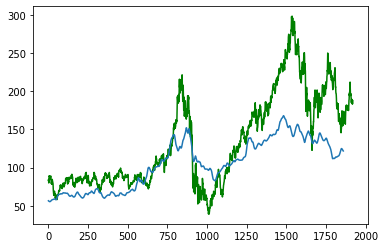

In [29]:
plt.plot(unscaled_data.iloc[:,0], color= 'green')
plt.plot((train_pred-scaler.min_[0])/scaler.scale_[0])

In [30]:
scaler.scale_

array([0.00386817, 0.01409046])

In [118]:
def load_data(company, start, end):
    data = web.DataReader(company, 'yahoo', start, end)
    return data

In [119]:
company = 'PFE'

In [120]:
data = load_data(company = company,
                 start = dt.datetime(1972,1,1),
                 end = dt.datetime(2019,1,1))
display(data)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1972-06-01,0.815346,0.802993,0.000000,0.815346,2458771.0,0.187400
1972-06-02,0.817817,0.802993,0.815346,0.805463,1613885.0,0.185129
1972-06-05,0.807934,0.798051,0.805463,0.802993,2585251.0,0.184561
1972-06-06,0.825229,0.800522,0.802993,0.820288,2347469.0,0.188536
1972-06-07,0.820288,0.807934,0.820288,0.820288,1032077.0,0.188536
...,...,...,...,...,...,...
2018-12-24,39.810246,38.444023,39.667931,38.472485,19778205.0,35.255787
2018-12-26,40.037952,38.349148,38.576851,40.028461,25437131.0,36.681675
2018-12-27,40.654648,39.146111,39.667931,40.654648,28894672.0,37.255508


In [121]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [122]:
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [123]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

In [124]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [126]:
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)

model.fit(x_train, 
          y_train, 
          epochs=5, 
          batch_size = 32,
          callbacks = [checkpointer])

Epoch 1/5
366/366 [==============================] - 20s 54ms/step - loss: 8.2738e-04
Epoch 2/5
366/366 [==============================] - 19s 52ms/step - loss: 8.4799e-04
Epoch 3/5
366/366 [==============================] - 19s 51ms/step - loss: 8.5104e-04
Epoch 4/5
366/366 [==============================] - 19s 52ms/step - loss: 8.2311e-04
Epoch 5/5
366/366 [==============================] - 20s 54ms/step - loss: 7.8743e-04


In [127]:
test_data = load_data(company = 'PFE',
                      start = dt.datetime(2021,1,1),
                      end = dt.datetime.now())

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [137]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))
print(x_test.shape)

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

(81, 60, 1)


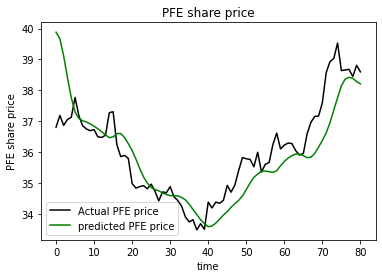

In [129]:
plt.plot(actual_prices, color='black', label=f"Actual {company} price")
plt.plot(predicted_prices, color= 'green', label=f"predicted {company} price")
plt.title(f"{company} share price")
plt.xlabel("time")
plt.ylabel(f"{company} share price")
plt.legend()
plt.show()

In [138]:
real_data = [model_inputs[len(model_inputs)+1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
display(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
real_data.shape

array([[0.73246014, 0.73309773, 0.73097238, 0.73416048, 0.72927212,
        0.72268341, 0.72884703, 0.72820937, 0.73246014, 0.72544643,
        0.72289592, 0.71907023, 0.71163143, 0.70823083, 0.70971859,
        0.70270488, 0.70695557, 0.70312988, 0.72183324, 0.71779505,
        0.72183324, 0.72098307, 0.7231085 , 0.73331031, 0.72863445,
        0.73352281, 0.74351212, 0.75243876, 0.75158859, 0.7511635 ,
        0.74606256, 0.75605186, 0.74244945, 0.7477629 , 0.74903807,
        0.76136531, 0.76922919, 0.75838979, 0.76094023, 0.76242799,
        0.7620029 , 0.75711454, 0.75413902, 0.75520169, 0.76880411,
        0.77666807, 0.78070626, 0.78091876, 0.7900579 , 0.81067411,
        0.81832549, 0.82045083, 0.83107773, 0.81216187, 0.81258695,
        0.81301204, 0.80812367, 0.81577505, 0.81131169]])

(1, 59, 1)

In [131]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"prediction: {prediction}")

prediction: [[38.159657]]


In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os
import random

In [74]:
os.chdir('./Stocks')

FileNotFoundError: [Errno 2] No such file or directory: './Stocks'

In [75]:
files=os.listdir()
len(files)

7195

In [76]:
data=random.sample([x for x in files if x.endswith('txt') and x.startswith('cms')and os.path.getsize(x)>400000],1)

In [77]:
data

['cms.us.txt']

In [78]:
for i in data:
    df = pd.read_csv(i)

In [79]:
#set date column as index and drop from dataframe
df=df.set_index(df['Date'])
df.drop('Date',axis=1,inplace=True)
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1984-12-31,2.1121,2.2303,2.1121,2.2303,1003711,0
1985-01-02,2.2303,2.2303,2.1750,2.2303,126257,0
1985-01-03,2.2303,2.2303,2.1750,2.2303,62047,0
1985-01-04,2.2303,2.2303,2.1750,2.2303,76517,0
1985-01-07,2.1750,2.2303,2.1750,2.1750,96819,0


In [71]:
df.shape

(8280, 6)

In [73]:
window_size=30
train_data=df.iloc[:(7200+window_size), 0:1]
display(train_data)
train_data.shape

,Open
Date,
1984-12-31,2.1121
1985-01-02,2.2303
1985-01-03,2.2303
1985-01-04,2.2303
1985-01-07,2.1750
...,...
2013-09-06,22.6120
2013-09-09,22.6520
2013-09-10,22.6620


(7230, 1)

In [ ]:
#preprocess data using Minmax sclaer
scaler=preprocessing.MinMaxScaler()
train_data_transform=scaler.fit_transform(np.array(train_data))

In [ ]:
x_train,y_train=[],[]
for i in range(len(train_data_transform)-window_size):
    x_train.append(train_data_transform[i:i+window_size])
    y_train.append(train_data_transform[i+window_size])

In [70]:
x_train=np.array(x_train)
x_train.shape

(1700, 60, 1)

In [59]:
y_train=np.array(y_train)
y_train.shape

(1700,)

In [60]:
model=tf.keras.models.Sequential(
    [tf.keras.layers.LSTM(100,return_sequences=True,input_shape=(x_train.shape[1], x_train.shape[2])),
     tf.keras.layers.Dropout(0.3),
     tf.keras.layers.LSTM(50,return_sequences=True),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(50),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(1)
    ])


model.summary()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 100)           40800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            30200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [61]:
model.fit(x_train, y_train, epochs=13, batch_size=40)

Epoch 1/13
43/43 [==============================] - 6s 71ms/step - loss: 0.0485 - accuracy: 1.3702e-04
Epoch 2/13
43/43 [==============================] - 3s 70ms/step - loss: 0.0034 - accuracy: 5.3328e-04
Epoch 3/13
43/43 [==============================] - 3s 70ms/step - loss: 0.0032 - accuracy: 9.1878e-04
Epoch 4/13
43/43 [==============================] - 3s 69ms/step - loss: 0.0032 - accuracy: 0.0021
Epoch 5/13
43/43 [==============================] - 3s 68ms/step - loss: 0.0027 - accuracy: 6.3129e-04
Epoch 6/13
43/43 [==============================] - 3s 68ms/step - loss: 0.0024 - accuracy: 0.0018
Epoch 7/13
43/43 [==============================] - 3s 67ms/step - loss: 0.0024 - accuracy: 0.0011
Epoch 8/13
43/43 [==============================] - 3s 70ms/step - loss: 0.0025 - accuracy: 0.0012
Epoch 9/13
43/43 [==============================] - 3s 71ms/step - loss: 0.0024 - accuracy: 2.4748e-04
Epoch 10/13
43/43 [==============================] - 3s 69ms/step - loss: 0.0020 - accura

In [62]:
train_data = df.iloc[ :int(7200)]
test_data = df.iloc[int(7200): ]
        
        # combining the dataset and taking final test_data shape.
data = pd.concat((train_data['Open'], test_data['Open']), axis=0)
        # len(train_data) - window_size == 7242 - 10 == 7432.
        # Hence, test_set starts from 7432 to take 7243 row as output.
test_input_shape = data[len(train_data) - window_size: ].values
test_input_shape = test_input_shape.reshape(-1,1)
test_input_shape = scaler.transform(test_input_shape) #only transforming the test data.
        
X_test = []
        
for i in range(window_size, len(test_data)+window_size): 
    X_test.append(test_input_shape[i-window_size:i, 0])
            
X_test = np.array(X_test)

In [135]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [134]:
prediction = model.predict(X_test)

prediction_inverse = scaler.inverse_transform(prediction)

In [65]:
prediction_inverse.shape

(1080, 1)

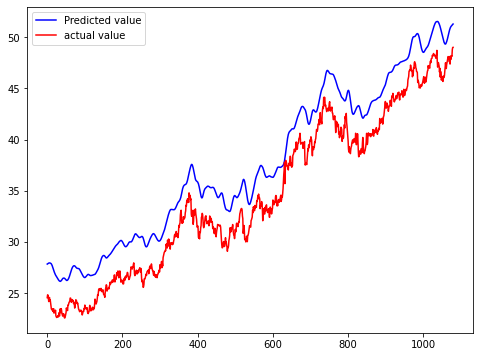

In [66]:
y_test = df.iloc[int(7200): ,0:1].values
plt.figure(figsize=(8,6))
plt.plot(prediction_inverse, color='blue', label='Predicted value')
plt.plot(y_test, color ='red', label='actual value')
plt.legend()
plt.show()